## Import Required Libraries and do the Initial Dataset Analysis

In [177]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action="ignore")

In [178]:
df = pd.read_csv("./BlackFridaySales.csv")

In [179]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [180]:
df.shape

(550068, 12)

In [181]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


## Checking Null values

In [182]:
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

## Null Value in percentage

In [183]:
df.isnull().sum()/df.shape[0]*100

User_ID                        0.000000
Product_ID                     0.000000
Gender                         0.000000
Age                            0.000000
Occupation                     0.000000
City_Category                  0.000000
Stay_In_Current_City_Years     0.000000
Marital_Status                 0.000000
Product_Category_1             0.000000
Product_Category_2            31.566643
Product_Category_3            69.672659
Purchase                       0.000000
dtype: float64

# Unique elements in each attributes

In [184]:
df.nunique()

User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category_1               20
Product_Category_2               17
Product_Category_3               15
Purchase                      18105
dtype: int64

# EDA

## Target Variable Purchase

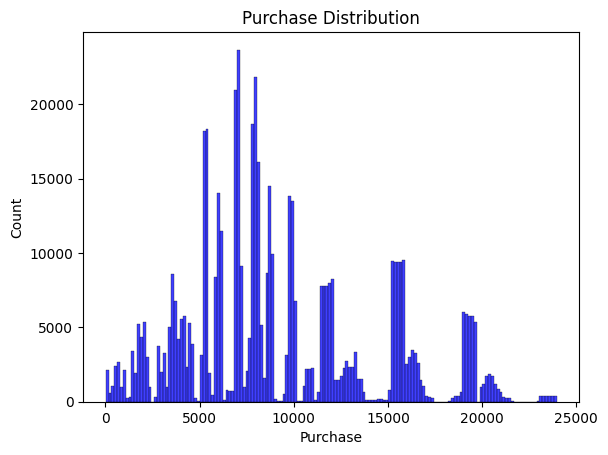

In [185]:
sns.histplot(df["Purchase"],color='b')
plt.title("Purchase Distribution")
plt.show()

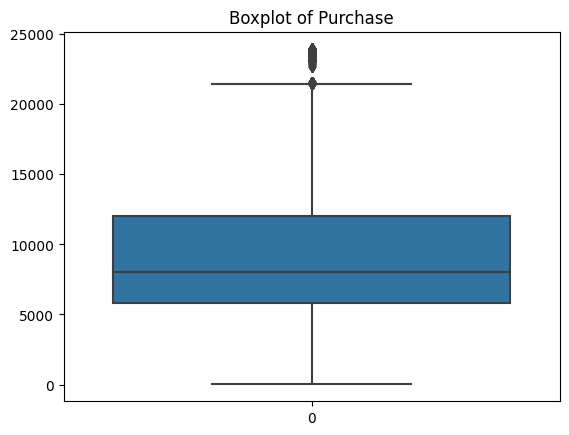

In [186]:
sns.boxplot(df["Purchase"])
plt.title("Boxplot of Purchase")
plt.show()

In [187]:
df["Purchase"].skew()

0.6001400037087128

In [188]:
df["Purchase"].kurtosis()

-0.3383775655851702

In [189]:
df["Purchase"].describe()

count    550068.000000
mean       9263.968713
std        5023.065394
min          12.000000
25%        5823.000000
50%        8047.000000
75%       12054.000000
max       23961.000000
Name: Purchase, dtype: float64

### Gender

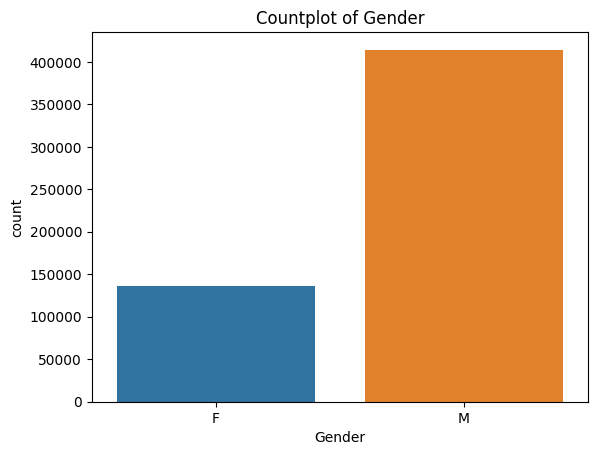

In [190]:
sns.countplot(x=df['Gender'])
plt.title("Countplot of Gender")
plt.show()

In [191]:
df['Gender'].value_counts(normalize=True)*100

M    75.310507
F    24.689493
Name: Gender, dtype: float64

In [192]:
df.groupby("Gender").mean()["Purchase"]

Gender
F    8734.565765
M    9437.526040
Name: Purchase, dtype: float64

### Marital Status

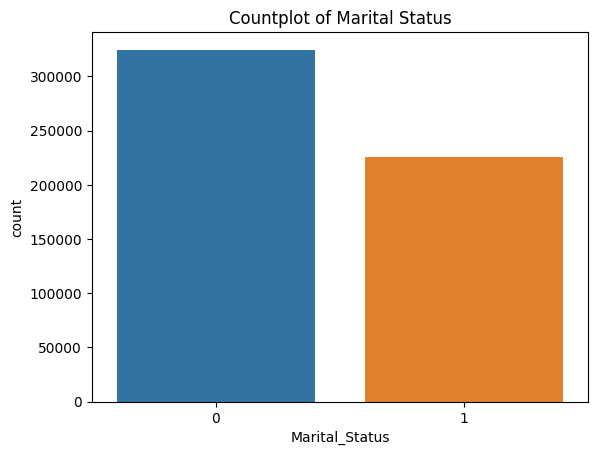

In [193]:
sns.countplot(x=df['Marital_Status'])
plt.title("Countplot of Marital Status")
plt.xlabel("Marital_Status")
plt.show()

In [194]:
df.groupby("Marital_Status").mean()["Purchase"]

Marital_Status
0    9265.907619
1    9261.174574
Name: Purchase, dtype: float64

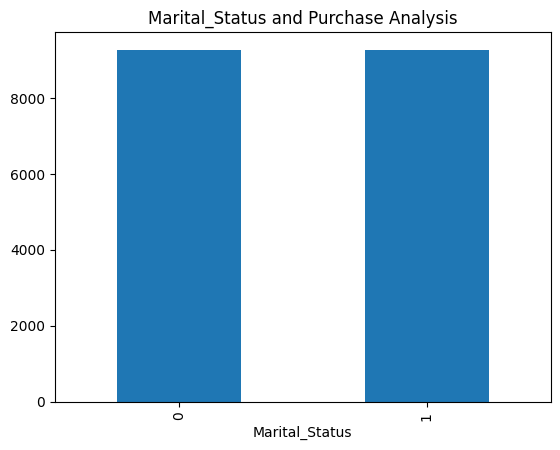

In [195]:
df.groupby("Marital_Status").mean()["Purchase"].plot(kind='bar')
plt.title("Marital_Status and Purchase Analysis")
plt.show()

### Occupation

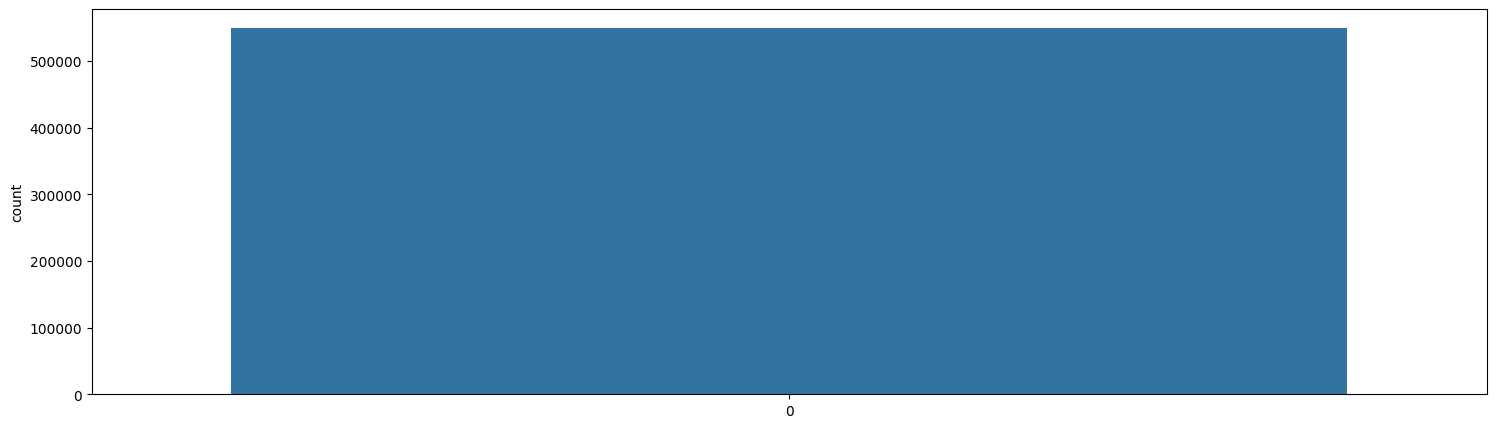

In [196]:
plt.figure(figsize=(18,5))
sns.countplot(df['Occupation'])
plt.show()

In [197]:
occup = pd.DataFrame(df.groupby("Occupation").mean()["Purchase"])
occup

,Purchase
Occupation,
0,9124.428588
1,8953.193270
2,8952.481683
3,9178.593088
4,9213.980251
5,9333.149298
6,9256.535691
7,9425.728223
8,9532.592497


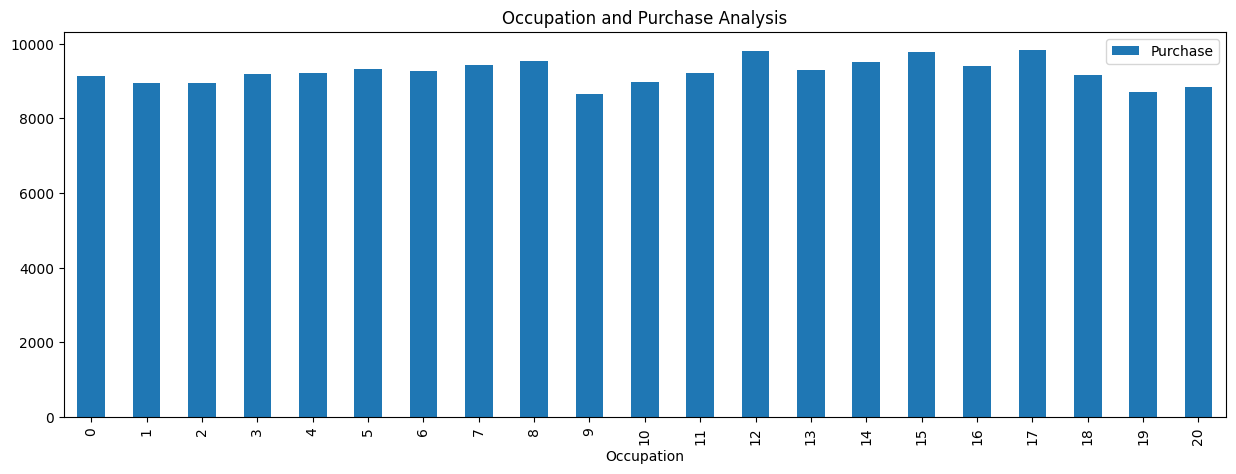

In [198]:
occup.plot(kind='bar',figsize=(15,5))
plt.title("Occupation and Purchase Analysis")
plt.show()

### City_Category

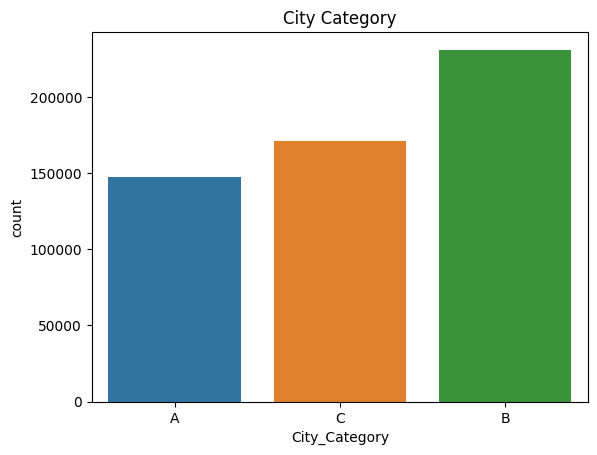

In [199]:
sns.countplot(x=df['City_Category'])
plt.xlabel("City_Category")
plt.title("City Category")
plt.show()

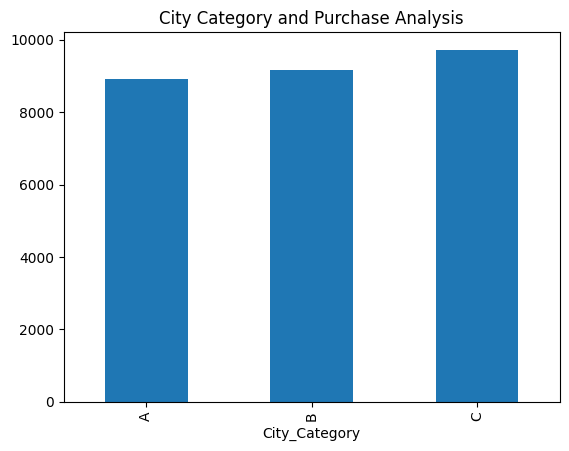

In [200]:
df.groupby("City_Category").mean()["Purchase"].plot(kind='bar')
plt.title("City Category and Purchase Analysis")
plt.show()

### Stay_In_Current_City_Years

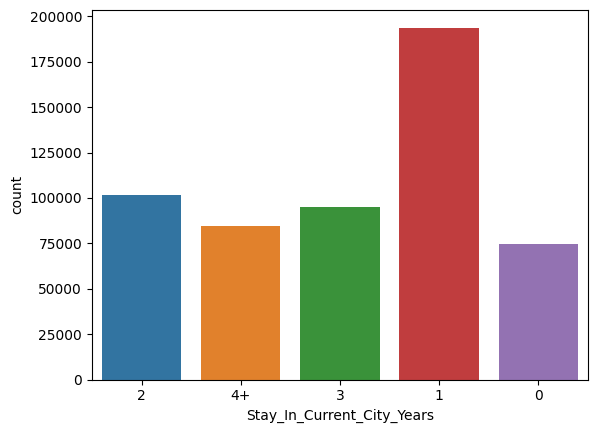

In [201]:
sns.countplot(x=df['Stay_In_Current_City_Years'])
plt.show()

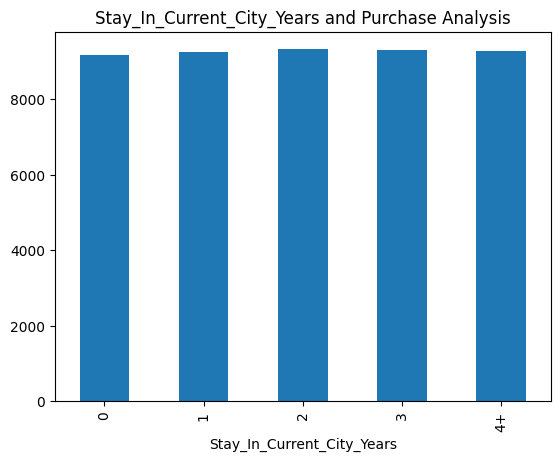

In [202]:
data.groupby("Stay_In_Current_City_Years").mean()["Purchase"].plot(kind='bar')
plt.title("Stay_In_Current_City_Years and Purchase Analysis")
plt.show()

### Age

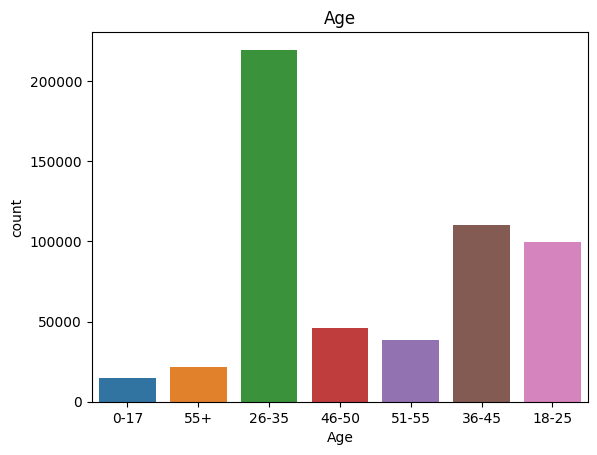

In [203]:
sns.countplot(x=df['Age'])
plt.title("Age")
plt.show()

<AxesSubplot: xlabel='Age'>

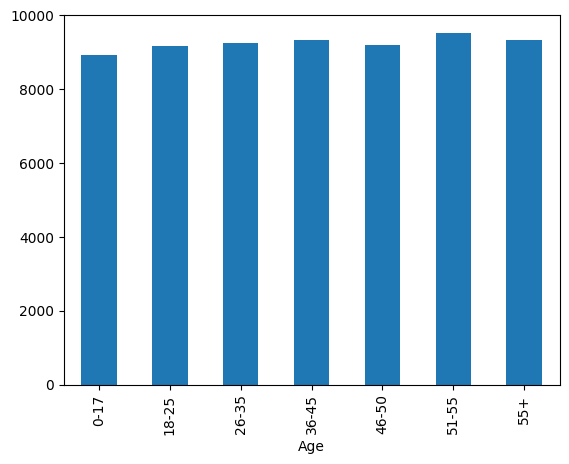

In [204]:
df.groupby("Age").mean()["Purchase"].plot(kind='bar')

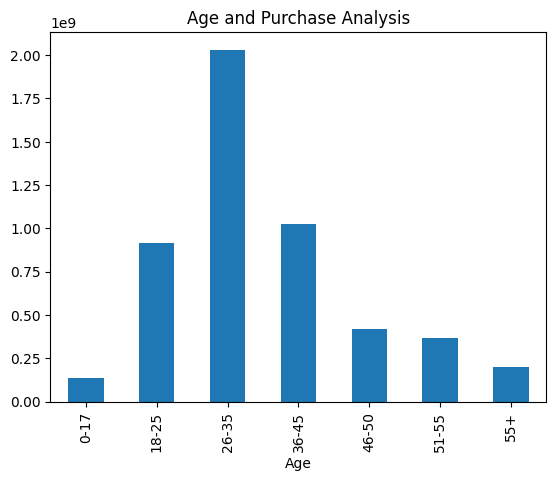

In [205]:
df.groupby("Age").sum()['Purchase'].plot(kind="bar")
plt.title("Age and Purchase Analysis")
plt.show()

### Product_Category_1

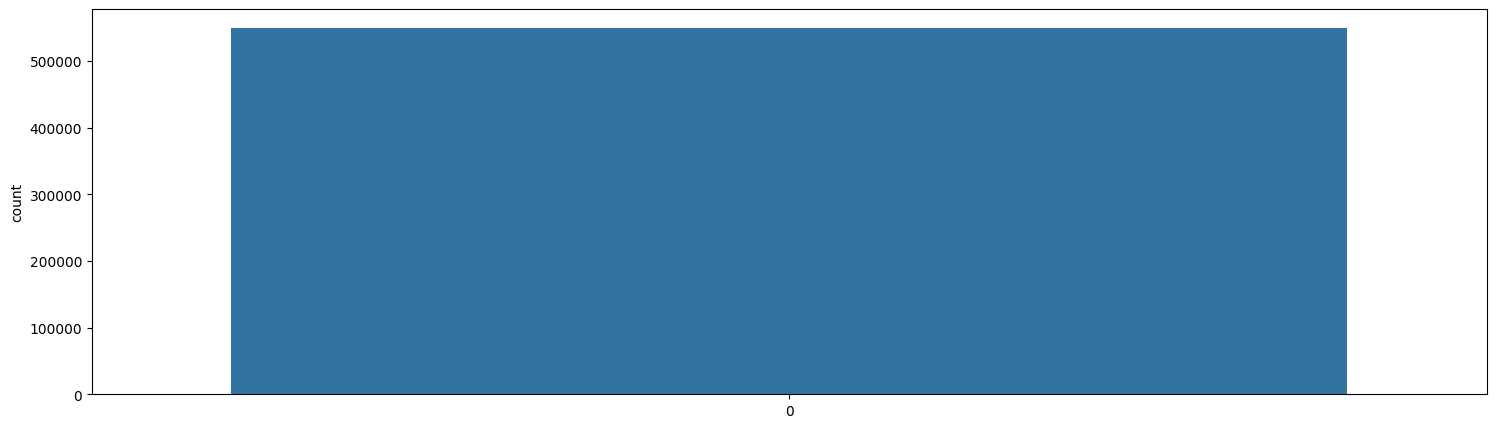

In [206]:
plt.figure(figsize=(18,5))
sns.countplot(df['Product_Category_1'])
plt.show()

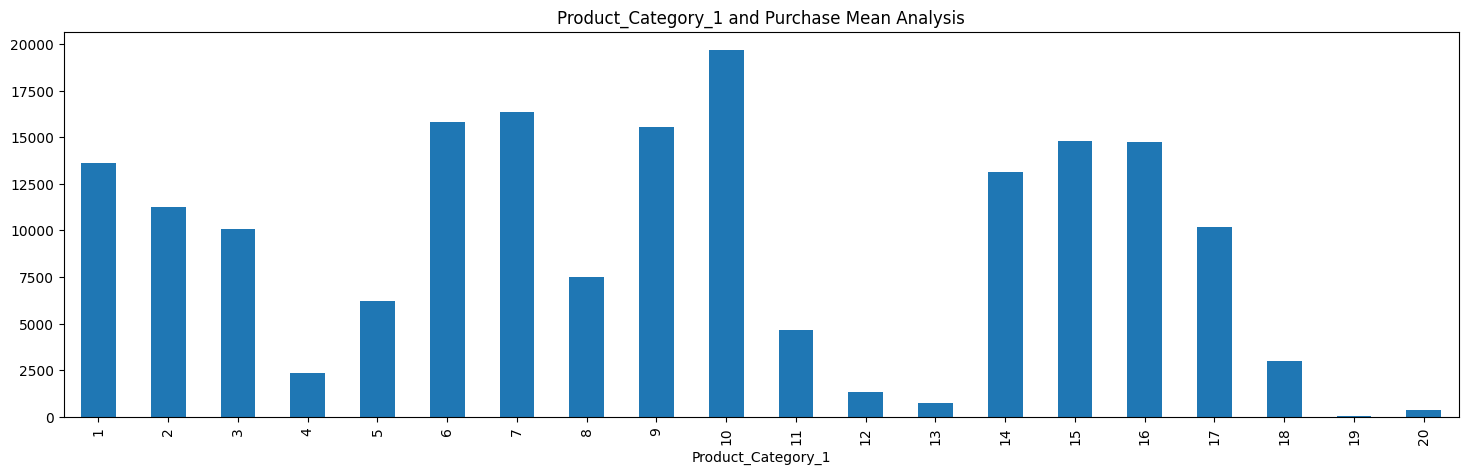

In [207]:
df.groupby('Product_Category_1').mean()['Purchase'].plot(kind='bar',figsize=(18,5))
plt.title("Product_Category_1 and Purchase Mean Analysis")
plt.show()

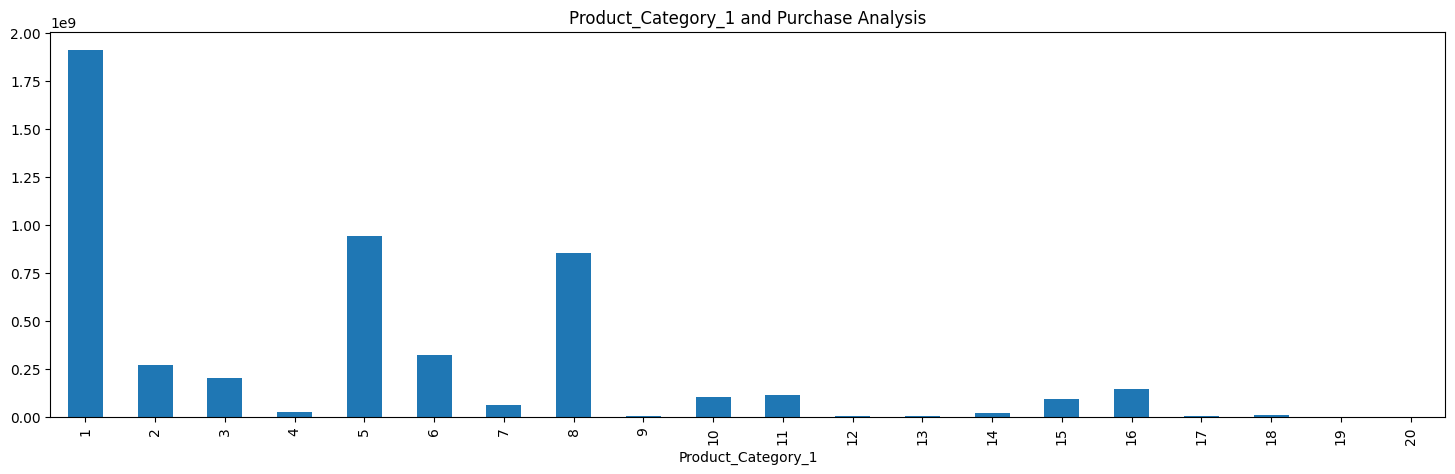

In [208]:
df.groupby('Product_Category_1').sum()['Purchase'].plot(kind='bar',figsize=(18,5))
plt.title("Product_Category_1 and Purchase Analysis")
plt.show()

### Product_Category_2

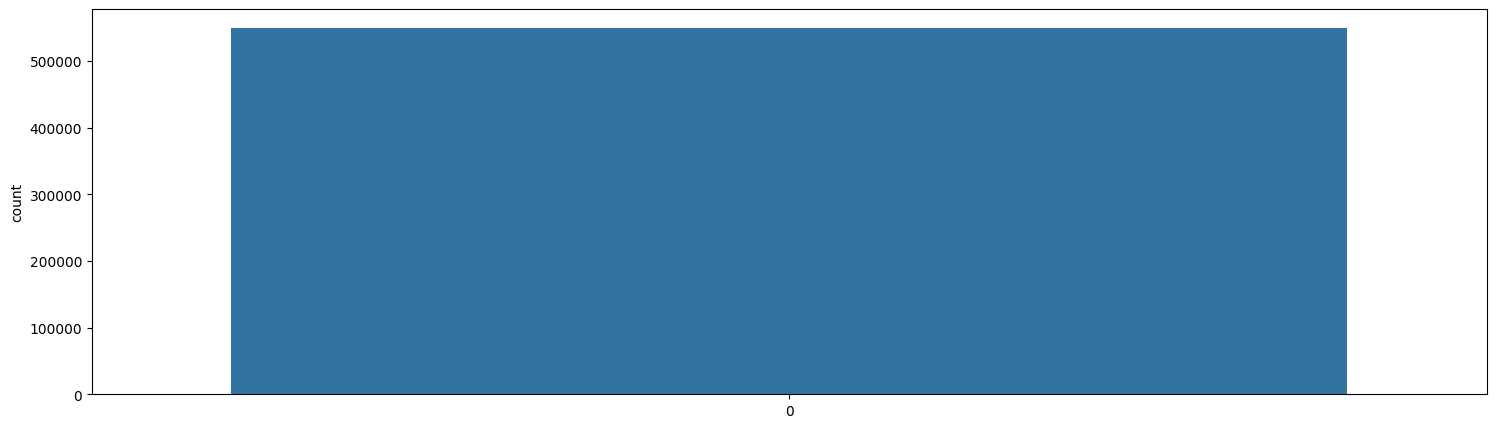

In [209]:
plt.figure(figsize=(18,5))
sns.countplot(df['Product_Category_2'])
plt.show()

### Product_Category_3

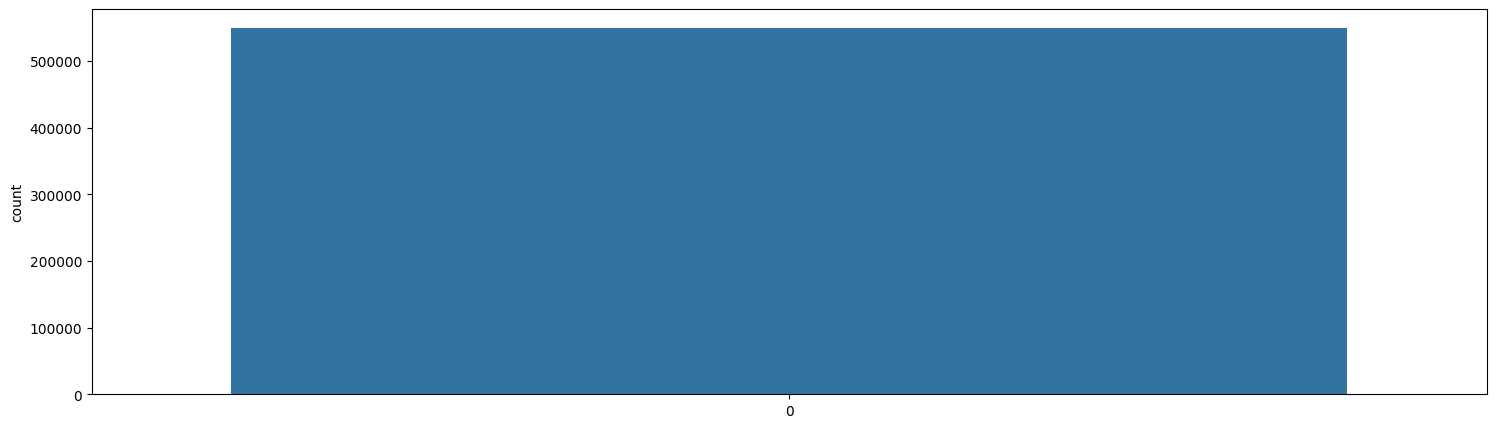

In [210]:
plt.figure(figsize=(18,5))
sns.countplot(df['Product_Category_3'])
plt.show()

In [211]:
df.corr()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
User_ID,1.000000,-0.023971,0.020443,0.003825,0.001529,0.003419,0.004716
Occupation,-0.023971,1.000000,0.024280,-0.007618,-0.000384,0.013263,0.020833
Marital_Status,0.020443,0.024280,1.000000,0.019888,0.015138,0.019473,-0.000463
Product_Category_1,0.003825,-0.007618,0.019888,1.000000,0.540583,0.229678,-0.343703
Product_Category_2,0.001529,-0.000384,0.015138,0.540583,1.000000,0.543649,-0.209918
Product_Category_3,0.003419,0.013263,0.019473,0.229678,0.543649,1.000000,-0.022006
Purchase,0.004716,0.020833,-0.000463,-0.343703,-0.209918,-0.022006,1.000000


## HeatMap

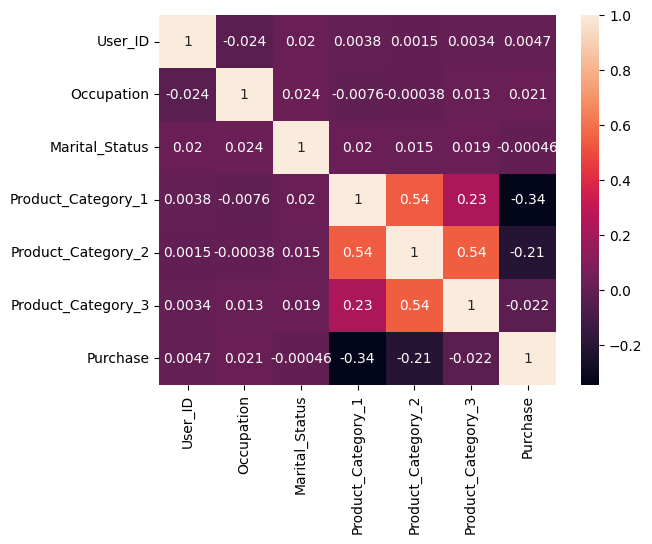

In [212]:
sns.heatmap(df.corr(),annot=True)
plt.show()

In [213]:
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [214]:
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].replace(to_replace="4+",value="4")

In [215]:
#Dummy Variables:
df = pd.get_dummies(df, columns=['Stay_In_Current_City_Years'])

## Encoding the categorical variables

In [216]:
from sklearn.preprocessing import LabelEncoder
lr = LabelEncoder()

In [217]:
df['Gender'] = lr.fit_transform(df['Gender'])
df['Age'] = lr.fit_transform(df['Age'])
df['City_Category'] = lr.fit_transform(df['City_Category'])

In [218]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Stay_In_Current_City_Years_0,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4
0,1000001,P00069042,0,0,10,0,0,3,NaN,NaN,8370,0,0,1,0,0
1,1000001,P00248942,0,0,10,0,0,1,6.0,14.0,15200,0,0,1,0,0
2,1000001,P00087842,0,0,10,0,0,12,NaN,NaN,1422,0,0,1,0,0
3,1000001,P00085442,0,0,10,0,0,12,14.0,NaN,1057,0,0,1,0,0
4,1000002,P00285442,1,6,16,2,0,8,NaN,NaN,7969,0,0,0,0,1


In [219]:
df['Product_Category_2'] =df['Product_Category_2'].fillna(0).astype('int64')
df['Product_Category_3'] =df['Product_Category_3'].fillna(0).astype('int64')

In [220]:
df.isnull().sum()

User_ID                         0
Product_ID                      0
Gender                          0
Age                             0
Occupation                      0
City_Category                   0
Marital_Status                  0
Product_Category_1              0
Product_Category_2              0
Product_Category_3              0
Purchase                        0
Stay_In_Current_City_Years_0    0
Stay_In_Current_City_Years_1    0
Stay_In_Current_City_Years_2    0
Stay_In_Current_City_Years_3    0
Stay_In_Current_City_Years_4    0
dtype: int64

In [221]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 16 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   User_ID                       550068 non-null  int64 
 1   Product_ID                    550068 non-null  object
 2   Gender                        550068 non-null  int64 
 3   Age                           550068 non-null  int64 
 4   Occupation                    550068 non-null  int64 
 5   City_Category                 550068 non-null  int64 
 6   Marital_Status                550068 non-null  int64 
 7   Product_Category_1            550068 non-null  int64 
 8   Product_Category_2            550068 non-null  int64 
 9   Product_Category_3            550068 non-null  int64 
 10  Purchase                      550068 non-null  int64 
 11  Stay_In_Current_City_Years_0  550068 non-null  uint8 
 12  Stay_In_Current_City_Years_1  550068 non-null  uint8 
 13 

## Dropping the irrelevant columns

In [222]:
df = df.drop(["User_ID","Product_ID"],axis=1)

## Splitting data into independent and dependent variables

In [223]:
X = df.drop("Purchase",axis=1)

In [224]:
y=df['Purchase']

In [225]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

## Modeling

# Linear Regressor 

In [256]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score

In [251]:
LR = LinearRegression()

In [252]:
LR.fit(X_train, y_train)

LinearRegression()

In [257]:
lr_y_pred = LR.predict(X_test)

In [258]:
mean_absolute_error(y_test, lr_y_pred)

3532.0687400202096

In [259]:
mean_squared_error(y_test, lr_y_pred)

21397849.586759903

In [260]:
r2_score(y_test, lr_y_pred)

0.1519295911708135

In [262]:
from math import sqrt
print("RMSE of Linear Regressor Model is ",sqrt(mean_squared_error(y_test, lr_y_pred)))

RMSE of Linear Regressor Model is  4625.780970469733


# Random Forest Regressor

In [244]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score

In [247]:
RFregressor = RandomForestRegressor(random_state = 0)  

In [227]:
RFregressor.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [228]:
rf_y_pred = RFregressor.predict(X_test)

In [229]:
mean_absolute_error(y_test, rf_y_pred)

2222.049109204734

In [230]:
mean_squared_error(y_test, rf_y_pred)

9310769.87311957

In [231]:
r2_score(y_test, rf_y_pred)

0.6309821516972987

In [232]:
from math import sqrt
print("RMSE of Random Forest Model is ",sqrt(mean_squared_error(y_test, rf_y_pred)))

RMSE of Random Forest Model is  3051.35541573242


# XGBoost Regressor

In [234]:
from xgboost.sklearn import XGBRegressor

In [235]:
xgb_reg = XGBRegressor(learning_rate=1.0, max_depth=6, min_child_weight=40, seed=0)
xgb_reg.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=1.0, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=40, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [236]:
xgb_y_pred = xgb_reg.predict(X_test)

In [237]:
mean_absolute_error(y_test, xgb_y_pred)

2144.8588298827412

In [238]:
mean_squared_error(y_test, xgb_y_pred)

8268802.184348016

In [239]:
r2_score(y_test, xgb_y_pred)

0.67227891659979

In [240]:
from math import sqrt
print("RMSE of XGBoost Model is ",sqrt(mean_squared_error(y_test, xgb_y_pred)))

RMSE of XGBoost Model is  2875.5525007114747
